## Getting the temperature measurement from Thorlabs TED 200 C Temperature controller

Below there is just a code that calculates the $\beta$ value and temperature in Celsius depending on the resistance reading $R$ on instrument.

$\beta=\displaystyle{\frac{\ln (R/R_0)}{\frac{1}{T}-\frac{1}{T_0}}}$

$T(R)=\displaystyle{\frac{\beta T_0}{T_0 \ln(R/R_0)+\beta}}$

There is also a quick helper function to convert from Kelvin to Celsius and vice versa.

In the last `print` statement, change just the value of the first argument in function `get_temp()`, where you enter the actual reading that you get.

You can change the calibration (`B_val_g`) depending on the actual thermistor by supplying actual values from your specs.

I attach additional manuals, where you can read more about the actual setup that I was using.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def c_to_k(temp_c):
  return 273.15+temp_c

def k_to_c(temp_k):
  return temp_k-273.15

def energy_constant(temp_room, temp_ohm, R_nominal):
  R = temp_ohm
  T = c_to_k(temp_room)
  T_0 = c_to_k(25) #K
  R_0 = R_nominal #Ohm
  return (T*T_0*np.log(R/R_0)) / (T_0-T)

# Enter to calibrate:
# 1) current room temperature (in celsius)
# 2) idle reading of TED200C in 20kOhm mode (in Ohm)
# 3) rated resistance from thermistor specification
B_val_g = energy_constant(23.65, 10629, 10000)
print(B_val_g)

print('Value today:')
print(B_val_g)
print('\n')

def get_temp(temp_ohm, R_nominal):
  R = temp_ohm
  T_0 = 298.15
  R_0 = R_nominal
  B_val = B_val_g
  return B_val*T_0 / (T_0 * np.log(R/R_0) + B_val)

# enter R and R_0 values to get temperature
print(k_to_c(get_temp(11448, 10000)))



3998.5455692992373
Value today:
3998.5455692992373


22.023655194337778


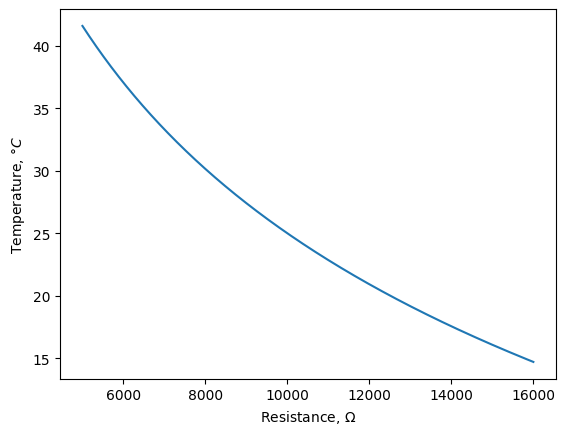

In [ ]:
R_values = list(range(5000, 16000))
T_values = [k_to_c(get_temp(R, 10000)) for R in R_values]
plt.plot(R_values, T_values)
plt.xlabel("Resistance, $\Omega$")
plt.ylabel("Temperature, $\degree C$")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
y = np.array([11948, 10000, 9543, 9150])
x = np.array([5.94, 4.97, 4.72, 4.55]).reshape(-1, 1)
lr.fit(x, y)
slope = lr.coef_[0]
intercept = lr.intercept_
print(slope)
print(intercept)
print(6.5*slope + intercept)
print(k_to_c(get_temp(6.5*slope + intercept, 10000)))
print(c_to_k(22.56))
print("Picoscope output in degC today:")
print(k_to_c(290.44))


1998.3884904519123
78.38006567010234
13067.905253607532
19.12681637444888
295.71
Picoscope output in degC today:
17.29000000000002
